# <center>Data Mining Project</center>

### <center>Matin Amani - 981152107</center>

### <font color="#09c">Phase 1</font>

1. Read train data from `./data/train.csv` and separate the features and label column.


In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from utils import k_means, k_means_predict, knn

sns.set_theme()

train_df = pd.read_csv("data/train.csv")
train_data = np.array(train_df.iloc[:, :-1].values)
train_labels = np.array(train_df.iloc[:, -1].values)

test_df = pd.read_csv("data/test.csv")
test_data = np.array(test_df.iloc[:, :-1].values)
test_labels = np.array(test_df.iloc[:, -1].values)

print(f"train_data Shape: {train_data.shape}")
print(f"test_data Shape: {test_data.shape}")

train_data Shape: (103, 4)
test_data Shape: (47, 4)


2. Using k-means clustering, divide `train_data` into `k` clusters(`k` will be given by the user) and save centroids.


In [167]:
k = 3
centroids, train_predicted_labels, train_clusters = k_means(train_data, k)

centroids

array([[6.23823529, 2.85      , 4.91764706, 1.65      ],
       [5.13448276, 3.54137931, 1.52068966, 0.25862069],
       [4.61666667, 3.11666667, 1.26666667, 0.16666667]])

### <font color="#09c">Phase 2</font>

2. Calculate the distances between `test_data` and centroids. Predict each sample's label.


In [168]:
(
    test_distances_from_centroids,
    test_labels_with_k_means,
    test_clusters,
) = k_means_predict(test_data, centroids)

test_labels_with_k_means

array([3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

3. run `knn` on each test sample. use different `k`'s and determine the best value for `k`.


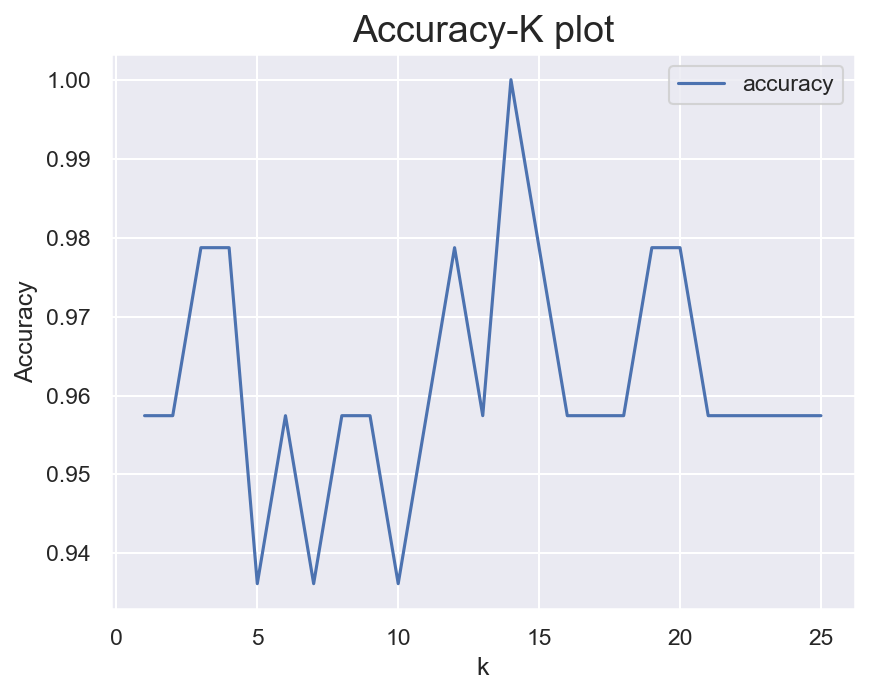

In [183]:
accuracy = []
x = range(1, 26)

for k in x:
    k_nearest_samples = knn(test_data, train_data, k)
    k_nearest_types = train_labels[k_nearest_samples]
    test_labels_with_knn = stats.mode(k_nearest_types, axis=1).mode
    accuracy.append(accuracy_score(test_labels, test_labels_with_knn))

fig, ax = plt.subplots(dpi=150)
ax.plot(x, accuracy, label="accuracy")
ax.set_title("Accuracy-K plot", fontsize=18)
ax.set_xlabel("k")
ax.set_ylabel("Accuracy")
ax.legend()

Based on above plot, `k = 12` returns the best accuracy for the test samples without overfitting.

4. Predict test labels using `KNN` and the best value for `k`


In [188]:
k = 12
k_nearest_samples = knn(test_data, train_data, k)
k_nearest_types = train_labels[k_nearest_samples]
test_labels_with_knn = stats.mode(k_nearest_types, axis=1).mode

test_labels_with_knn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

### <font color="#09c">Phase 3</font>

Calculate `accuracy`, `precision`, `recall` and `f1` for the predicted test labels.


In [189]:
avg = "macro"

accuracy = accuracy_score(test_labels, test_labels_with_knn)

precision = precision_score(
    test_labels, test_labels_with_knn, average=avg
)

recall = recall_score(test_labels, test_labels_with_knn, average=avg)

f1 = f1_score(test_labels, test_labels_with_knn, average=avg)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9787234042553191
Precision: 0.9803921568627452
Recall: 0.9791666666666666
F1-score: 0.9791463017269469
